In [4]:
#Remember you can use command line mode if installations are needed
#!pip install numpy==1.19.5
#!pip install matplotlib
#!pip install seaborn
#!pip install pandas
# [....] for you to add. Please include here for reference the libraries you will use. 

     ---------------------------------------- 7.3/7.3 MB 13.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [321 lines of output]
      setup.py:67: RuntimeWarning: NumPy 1.19.5 may not yet support Python 3.11.
        warnings.warn(
      Running from numpy source directory.
      setup.py:480: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
        run_build = parse_setuppy_commands()
      Cythonizing sources
      Processing numpy/random\_bounded_integers.pxd.in
      Processing numpy/random\bit_generator.pyx
      Processing numpy/random\mtrand.pyx
      Processing numpy/random\_bounded_integers.pyx.in
      Processing numpy/random\_common.pyx
      Processing numpy/random\_generator.pyx
      Processing numpy/random\_mt19937.pyx
      Processing numpy/random\_pcg64.pyx
      Processing numpy/random\_philox.pyx
      Processing numpy/random\_sfc64.pyx
      blas_opt_info:
      blas_mkl_info:
   

     ---------------------------------------- 8.0/8.0 MB 12.7 MB/s eta 0:00:00
     -------------------------------------- 188.2/188.2 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 12.7 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 2.9 MB/s eta 0:00:00
     --------------------------------------- 15.8/15.8 MB 12.6 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 12.4 MB/s eta 0:00:00
     -------------------------------------- 103.2/103.2 kB 5.8 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\f2py.exe' -> 'C:\\Python311\\Scripts\\f2py.exe.deleteme'


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 11.6/11.6 MB 9.2 MB/s eta 0:00:00
  Using cached matplotlib-3.9.0-cp311-cp311-win_amd64.whl (8.0 MB)
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl (188 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.51.0-cp311-cp311-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)
     -------------------------------------- 505.5/505.5 kB 5.3 MB/s eta 0:00:00
     -------------------------------------- 345.4/345.4 kB 7.1 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python311\\share'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl (11.6 MB)



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline     
sns.set(color_codes=True)

In [214]:
## HELPERS

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

EXPLAINED_VARIANCE = 0.99

def linkage_matrix(dataset):
    clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(dataset)

    counts = np.zeros(clustering.children_.shape[0])
    num_rows = len(clustering.labels_)
    for i, merge in enumerate(clustering.children_):
        current_count = 0
        for idx in merge:
            if idx < num_rows:
                current_count += 1
            else:
                current_count += counts[idx - num_rows]
        counts[i] = current_count

    return np.column_stack(
        [clustering.children_, clustering.distances_, counts]
    ).astype(float)

def plot_hypo_normo_3d(hypoxic, normoxic):
    ax = plt.axes(projection ="3d")

    ax.scatter3D(hypoxic[:, 0], hypoxic[:, 1], hypoxic[:, 2], color='red', label='Hypoxic')
    ax.scatter3D(normoxic[:, 0], normoxic[:, 1], normoxic[:, 2], color='blue', label='Normoxic')
    plt.legend()

    plt.show()

def plot_hypo_normo_2d(hypoxic, normoxic):
    ax = plt.axes()

    ax.scatter(hypoxic[:, 0], hypoxic[:, 1], color='red', label='Hypoxic')
    ax.scatter(normoxic[:, 0], normoxic[:, 1], color='blue', label='Normoxic')
    plt.legend()

    plt.show()

def read_file_index(filename):
    df = pd.read_csv(filename,delimiter="\ ",engine='python',index_col=0).T
    index = np.array([])

    for col in df.index:
        if 'Hypo' in col:
            index = np.append(index, 'Hypoxic')
        else:
            index = np.append(index, 'Normoxic')

    return df, index

def pca(data):
    pca = PCA()
    pca.fit(StandardScaler().fit_transform(data))
    cum = np.cumsum(pca.explained_variance_ratio_) 
    d = np.argmax(cum >= EXPLAINED_VARIANCE) + 1

    print("Original dimensionality:", len(data.columns))
    print("Reduced dimensionality:", d)

    plt.plot(cum)
    plt.xlabel("Dimensions")
    plt.ylabel("Explained Variance")
    plt.grid(True)
    plt.show()

## Unsupervised Learning

This section is about unsupervised learning for the filtered datasets. We cover: MCF Smart, HCC SmartSeq, MCF DropSeq, HCC DropSeq datasets.

Methodology:
- Compute PCA with 0.99 explained variance
- Transform data using PCA and scaler
- Plot transformed data on the top 3 and top 2 principal components
- Perform K-means on data with & without PCA
- Perform agglomerative clustering and show a dendrogram (this step is computationally intensive so we pmit it for especially large datasets)

#### Importing data

In [207]:
# Read in data. Rename index
df, index = read_file_index("dataset/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt")
df

,"""CYP1B1""","""CYP1B1-AS1""","""CYP1A1""","""NDRG1""","""DDIT4""","""PFKFB3""","""HK2""","""AREG""","""MYBL2""","""ADM""",...,"""CD27-AS1""","""DNAI7""","""MAFG""","""LZTR1""","""BCO2""","""GRIK5""","""SLC25A27""","""DENND5A""","""CDK5R1""","""FAM13A-AS1"""
"""output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam""",343,140,0,0,386,75,0,0,476,0,...,63,0,17,59,0,0,0,51,0,0
"""output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam""",131,59,0,1,289,42,0,856,1586,0,...,0,0,1,25,0,0,0,34,0,0
"""output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam""",452,203,0,0,0,0,0,0,775,0,...,15,0,23,0,0,0,0,0,0,0
"""output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam""",27,7,0,0,288,214,15,242,1191,0,...,1,0,3,10,0,0,0,4,0,0
"""output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam""",5817,2669,0,654,2484,1603,748,436,0,0,...,0,0,63,0,0,0,0,60,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam""",196,102,1,243,266,278,78,1,199,0,...,79,0,1,0,0,0,0,45,19,0
"""output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam""",504,238,0,62,417,932,275,0,33,0,...,86,0,0,0,0,0,0,0,0,0
"""output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam""",34565,13717,11274,1263,4256,5663,701,0,0,0,...,0,0,45,0,0,0,0,140,0,32
"""output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam""",20024,7835,563,925,12733,2187,1141,0,20,81,...,0,0,57,8,0,0,0,7,0,11


The dataframe is 250x3000! Very high dimensionality. We need to do dimensionality reduction to make k-means clustering effective.

#### PCA

Original dimensionality: 3000
Reduced dimensionality: 237


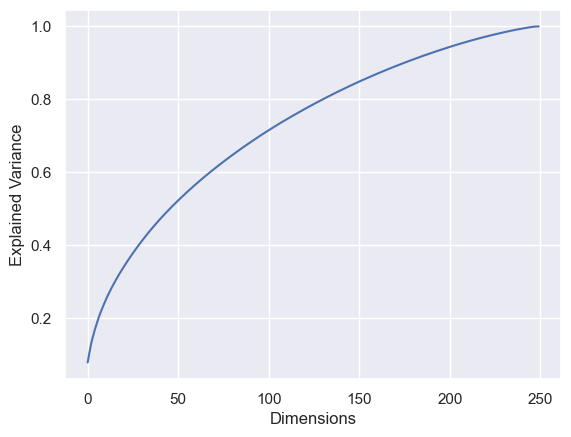

In [216]:
pca(df)


After performing PCA with 0.99 explained variance, we see that the dimensionality is reduced to 237 rows.

#### Transforming data with pca

In [210]:
data = StandardScaler().fit_transform(df)
transformed = PCA(n_components = EXPLAINED_VARIANCE).fit_transform(data)
np.shape(transformed)

(250, 237)

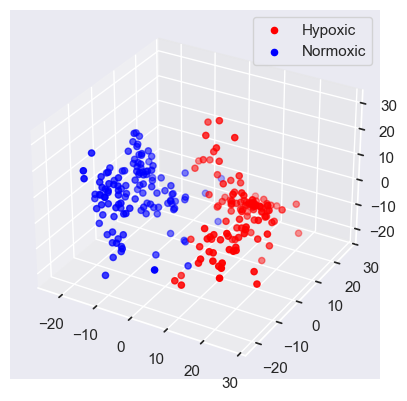

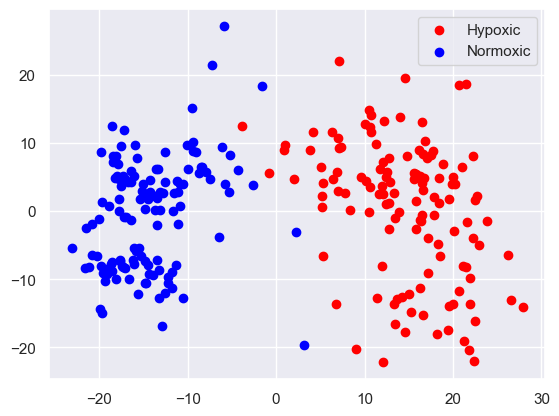

250


In [211]:
hypoxic = transformed[(index == 'Hypoxic')]
normoxic = transformed[(index == 'Normoxic')]

plot_hypo_normo_3d(hypoxic, normoxic)
plot_hypo_normo_2d(hypoxic, normoxic)

Here we visualize the data using the a scatterplot by using dimensions with the highest explained variance. The data looks highly separated and clustered around the respective means - perfect for k-means!

#### K-means clustering

(250, 71)
Accuracy (K-means with PCA):  0.968
Accuracy (K-means without PCA):  0.968


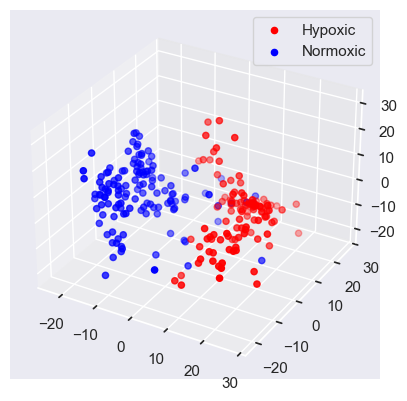

250


In [212]:
from sklearn.cluster import KMeans

# We found k-means clustering performs better on non-scaled data
transformed_no_scaler = PCA(n_components = EXPLAINED_VARIANCE).fit_transform(df)
print(np.shape(transformed_no_scaler))

kmeans_pca = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(transformed_no_scaler)
result_pca = kmeans_pca.labels_

kmeans_no_pca = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df)
result_no_pca = kmeans_no_pca.labels_

label_map = {
    0: "Hypoxic",
    1: "Normoxic"
}

def accuracy(result):
    num_right = 0
    for i in range(len(result)):
        if label_map[result[i]] == index[i]:
            num_right += 1
    return num_right/len(result)


print('Accuracy (K-means with PCA): ', accuracy(result_pca))
print('Accuracy (K-means without PCA): ', accuracy(result_no_pca))

hypoxic = transformed[(result_pca == 0)]
normoxic = transformed[(result_pca == 1)]

plot_hypo_normo_3d(hypoxic, normoxic)


Above we have the computation of Kmeans (2 clusters) with and without PCA. As we can see, the accuracy both with and without PCA is identical (96.8% - good result). The good result suggests again that the data is quite separable and the clusters are centered around the respective means.

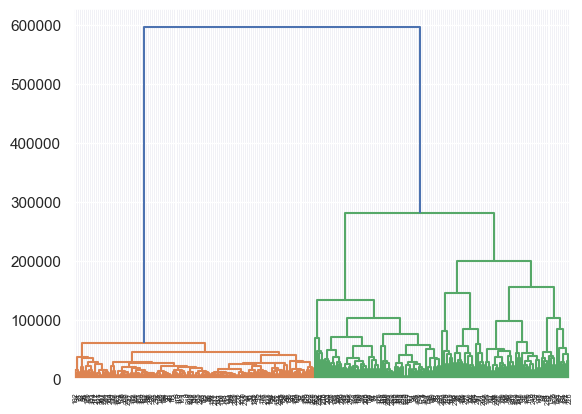

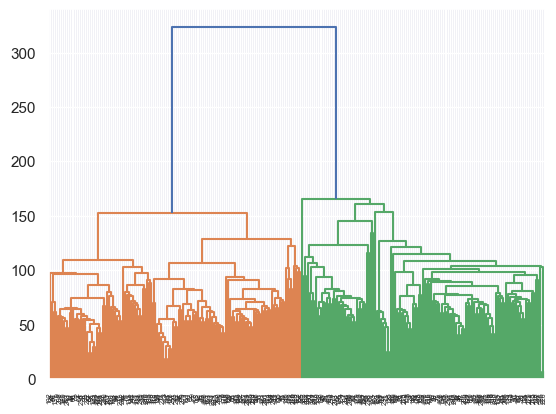

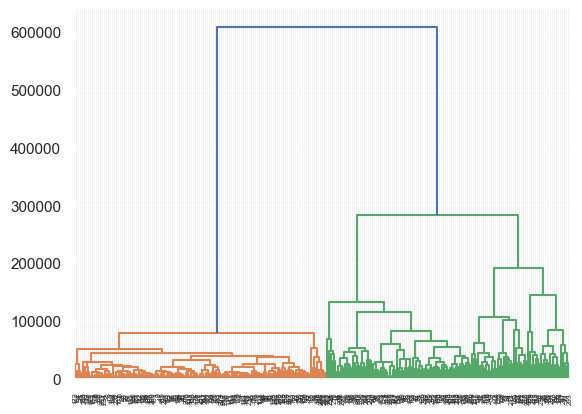

In [162]:
from scipy.cluster.hierarchy import dendrogram

dendrogram(linkage_matrix(df)) # Original data
plt.show()
dendrogram(linkage_matrix(transformed)) # Transformed with a standard scaler
plt.show()
dendrogram(linkage_matrix(transformed_no_scaler)) # Transformed without standard scaler
plt.show()

Dendograms! Fun stuff

Accuracy (Agglomerative Clustering):  0.996


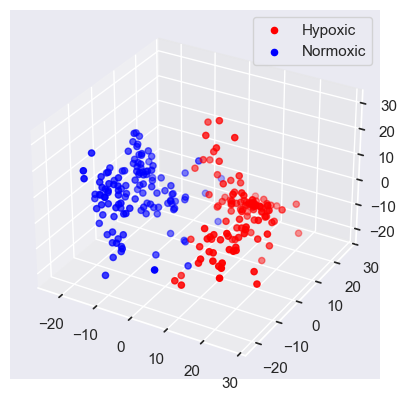

In [185]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(transformed)
result_clustering = clustering.labels_
print('Accuracy (Agglomerative Clustering): ', accuracy(result_clustering))

hypoxic = transformed[(result_clustering == 0)]
normoxic = transformed[(result_clustering == 1)]

p

plot_hypo_normo_3d(hypoxic, normoxic)

The results for agglomerative clustering are even better, 99.6% accuracy.

## HCC SmartSeq

In [186]:
# Read in data. Create index of hypoxic/normoxic columns.
df, index = read_file_index("dataset/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt")
df

,"""DDIT4""","""ANGPTL4""","""CALML5""","""KRT14""","""CCNB1""","""IGFBP3""","""AKR1C2""","""KRT6A""","""NDRG1""","""KRT4""",...,"""MST1R""","""ZYG11A""","""NRG1""","""RBMS3""","""VCPIP1""","""LINC02693""","""OR8B9P""","""NEAT1""","""ZDHHC23""","""ODAD2"""
"""output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam""",0,48,0,321,298,82,6250,634,0,0,...,78,10,136,0,0,29,0,29,0,0
"""output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam""",8739,2101,55,96,1824,1938,62,0,522,413,...,279,0,264,0,134,68,0,213,0,0
"""output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam""",13098,14032,0,0,1616,247,430,907,348,0,...,311,0,38,0,0,0,0,92,0,0
"""output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam""",2880,356,0,6211,3,3430,79,1953,592,176,...,125,0,16,0,4,1,0,1,0,0
"""output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam""",7777,5661,4383,0,145,4618,246,85,206,0,...,268,1,25,0,0,0,0,128,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam""",79,5,0,2098,554,99,798,4211,64,0,...,11,0,264,0,10,34,0,24,0,0
"""output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam""",167,1,0,27,3585,134,3,596,11,0,...,251,0,120,25,0,53,0,177,53,0
"""output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam""",10186,3147,0,149,1012,111,716,617,744,0,...,94,0,55,0,157,43,0,113,0,0
"""output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam""",238,41,2867,814,2207,297,1023,2879,1,0,...,149,0,42,0,26,0,0,13,5,0


#### PCA

Original dimensionality: 182
Reduced dimensionality: 175


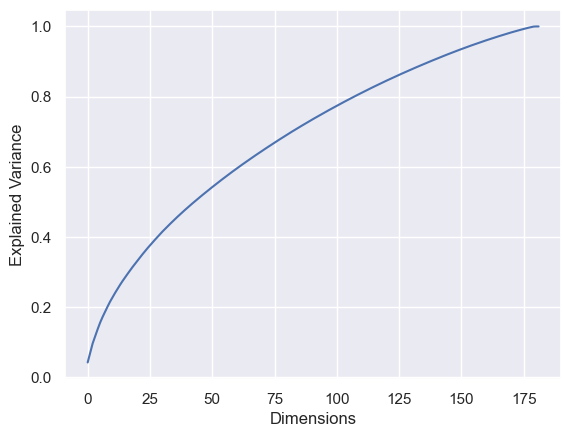

(182, 175)

In [194]:
pca(df)

data = StandardScaler().fit_transform(df)
transformed = PCA(n_components = EXPLAINED_VARIANCE).fit_transform(data)
np.shape(transformed)

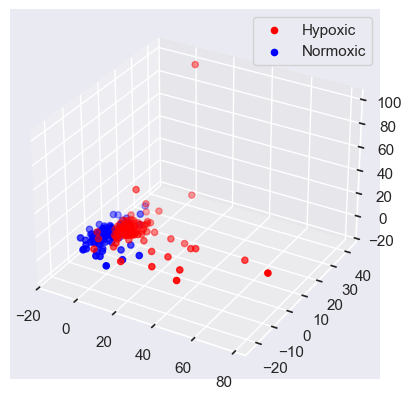

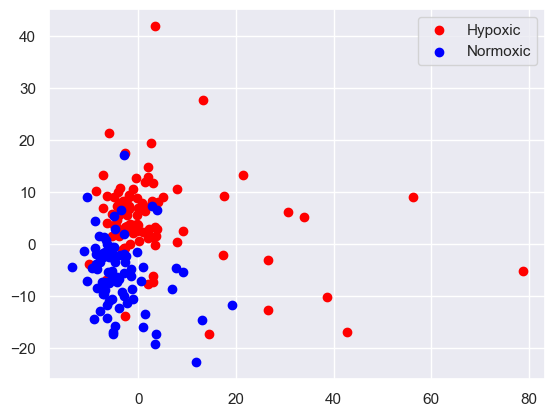

In [195]:
hypoxic = transformed[(index == 'Hypoxic')]
normoxic = transformed[(index == 'Normoxic')]

plot_hypo_normo_3d(hypoxic, normoxic)
plot_hypo_normo_2d(hypoxic, normoxic)

In [ ]:
#### K-means clustering

(182, 89)
Accuracy (K-means with PCA):  0.4835164835164835
Accuracy (K-means without PCA):  0.4835164835164835


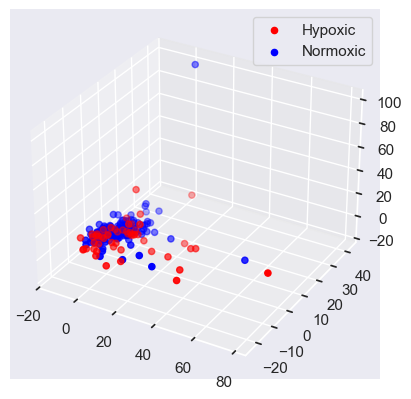

In [196]:
from sklearn.cluster import KMeans

# We found k-means clustering performs better on non-scaled data
transformed_no_scaler = PCA(n_components = EXPLAINED_VARIANCE).fit_transform(df)
print(np.shape(transformed_no_scaler))

kmeans_pca = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(transformed_no_scaler)
result_pca = kmeans_pca.labels_

kmeans_no_pca = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df)
result_no_pca = kmeans_no_pca.labels_

label_map = {
    0: "Hypoxic",
    1: "Normoxic"
}

def accuracy(result):
    num_right = 0
    for i in range(len(result)):
        if label_map[result[i]] == index[i]:
            num_right += 1
    return num_right/len(result)


print('Accuracy (K-means with PCA): ', accuracy(result_pca))
print('Accuracy (K-means without PCA): ', accuracy(result_no_pca))

hypoxic = transformed[(result_pca == 0)]
normoxic = transformed[(result_pca == 1)]

plot_hypo_normo_3d(hypoxic, normoxic)


Again, almost no difference between pca/no pca. However, in this dataset, the accuract is 48% - much lower than the first dataset we explored. Lets explore some dendograms...

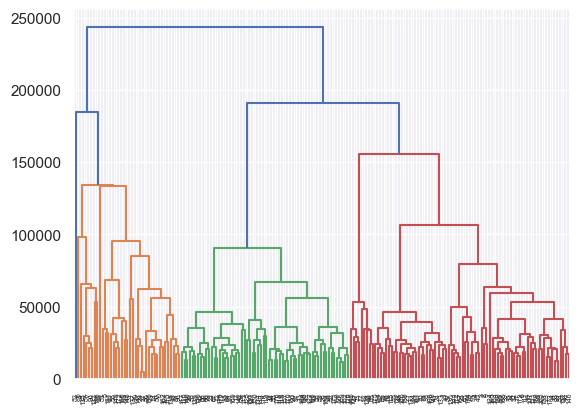

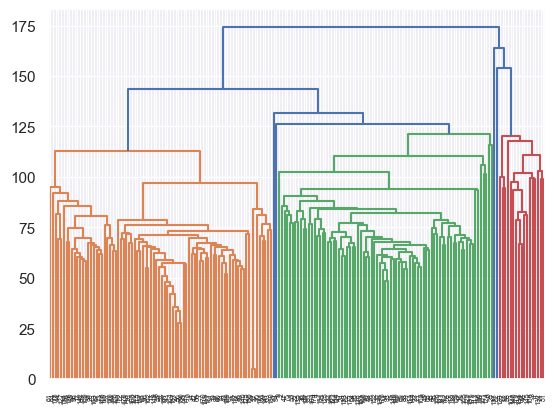

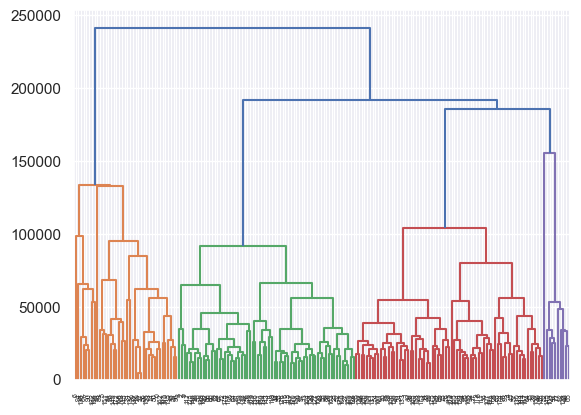

In [197]:
from scipy.cluster.hierarchy import dendrogram

dendrogram(linkage_matrix(df)) # Original data
plt.show()
dendrogram(linkage_matrix(transformed)) # Transformed with a standard scaler
plt.show()
dendrogram(linkage_matrix(transformed_no_scaler)) # Transformed without standard scaler
plt.show()

## MCF DROP

In [198]:
# Read in data. Create index of hypoxic/normoxic columns. Huge dataset - can take a minute to load.
df, index = read_file_index("dataset/MCF7_Filtered_Normalised_3000_Data_train.txt")
df

,"""MALAT1""","""MT-RNR2""","""NEAT1""","""H1-5""","""TFF1""","""MT-RNR1""","""H4C3""","""GDF15""","""KRT81""","""MT-CO3""",...,"""MROH1""","""SKIDA1""","""MICALL1""","""RARG""","""MYO1F""","""BRWD1-AS2""","""RPS19BP1""","""AUNIP""","""TNK2""","""SUDS3"""
"""AAAAACCTATCG_Normoxia""",1,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACAACCCTA_Normoxia""",3,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACACTCTCA_Normoxia""",3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACCAGGCAC_Normoxia""",6,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACCTAGCTC_Normoxia""",4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""TTTTCGCGTAGA_Hypoxia""",0,0,0,0,3,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""TTTTCGTCCGCT_Hypoxia""",1,0,0,0,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
"""TTTTCTCCGGCT_Hypoxia""",0,0,0,1,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"""TTTTGTTCAAAG_Hypoxia""",0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### PCA

Original dimensionality: 21626
Reduced dimensionality: 2920


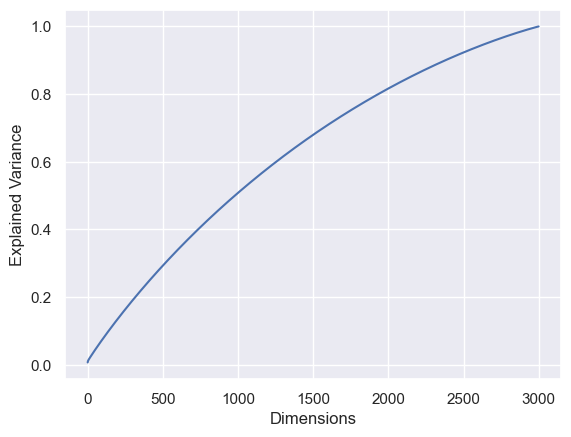

(21626, 2920)

In [199]:
pca(df)

data = StandardScaler().fit_transform(df)
transformed = PCA(n_components = EXPLAINED_VARIANCE).fit_transform(data)
np.shape(transformed)

#### Lets plot it

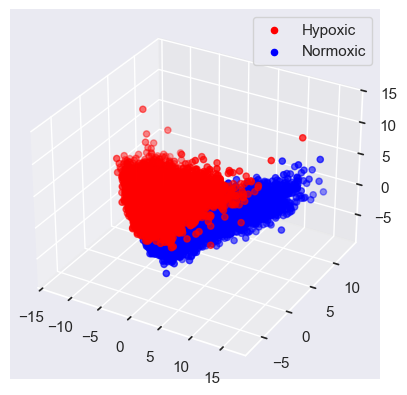

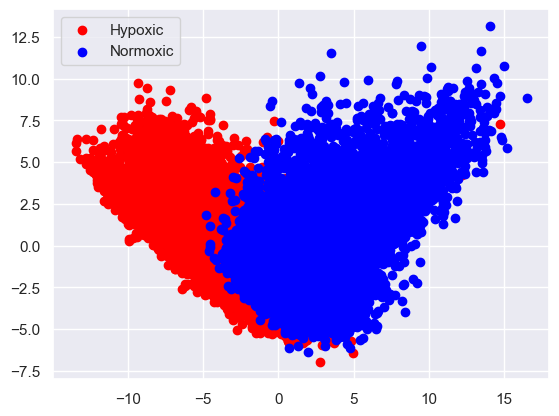

In [200]:
hypoxic = transformed[(index == 'Hypoxic')]
normoxic = transformed[(index == 'Normoxic')]

plot_hypo_normo_3d(hypoxic, normoxic)
plot_hypo_normo_2d(hypoxic, normoxic)

#### K-means clustering

(21626, 1674)
Accuracy (K-means with PCA):  0.5456395079996301
Accuracy (K-means without PCA):  0.5456395079996301


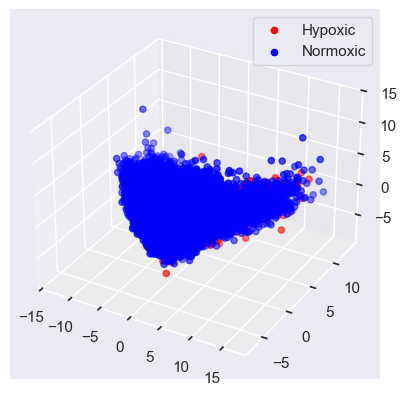

In [201]:
from sklearn.cluster import KMeans

# We found k-means clustering performs better on non-scaled data
transformed_no_scaler = PCA(n_components = EXPLAINED_VARIANCE).fit_transform(df)
print(np.shape(transformed_no_scaler))

kmeans_pca = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(transformed_no_scaler)
result_pca = kmeans_pca.labels_

kmeans_no_pca = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df)
result_no_pca = kmeans_no_pca.labels_

label_map = {
    0: "Hypoxic",
    1: "Normoxic"
}

def accuracy(result):
    num_right = 0
    for i in range(len(result)):
        if label_map[result[i]] == index[i]:
            num_right += 1
    return num_right/len(result)


print('Accuracy (K-means with PCA): ', accuracy(result_pca))
print('Accuracy (K-means without PCA): ', accuracy(result_no_pca))

hypoxic = transformed[(result_pca == 0)]
normoxic = transformed[(result_pca == 1)]

plot_hypo_normo_3d(hypoxic, normoxic)

#### Dendograms

In [204]:
from scipy.cluster.hierarchy import dendrogram

# These take forever - we omit it
# dendrogram(linkage_matrix(transformed)) # Transformed with a standard scaler
# plt.show()
# dendrogram(linkage_matrix(transformed_no_scaler)) # Transformed without standard scaler
# plt.show()

## HCC DROP

In [217]:
# Read in data. Create index of hypoxic/normoxic columns. Huge dataset - can take a minute to load.
df, index = read_file_index("dataset/MCF7_Filtered_Normalised_3000_Data_train.txt")
df

,"""MALAT1""","""MT-RNR2""","""NEAT1""","""H1-5""","""TFF1""","""MT-RNR1""","""H4C3""","""GDF15""","""KRT81""","""MT-CO3""",...,"""MROH1""","""SKIDA1""","""MICALL1""","""RARG""","""MYO1F""","""BRWD1-AS2""","""RPS19BP1""","""AUNIP""","""TNK2""","""SUDS3"""
"""AAAAACCTATCG_Normoxia""",1,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACAACCCTA_Normoxia""",3,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACACTCTCA_Normoxia""",3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACCAGGCAC_Normoxia""",6,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACCTAGCTC_Normoxia""",4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""TTTTCGCGTAGA_Hypoxia""",0,0,0,0,3,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""TTTTCGTCCGCT_Hypoxia""",1,0,0,0,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
"""TTTTCTCCGGCT_Hypoxia""",0,0,0,1,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"""TTTTGTTCAAAG_Hypoxia""",0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### PCA

Original dimensionality: 3000
Reduced dimensionality: 2920


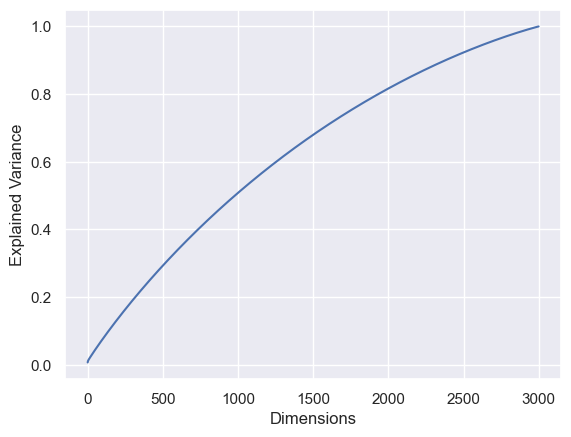

(21626, 2920)

In [218]:
pca(df)

data = StandardScaler().fit_transform(df)
transformed = PCA(n_components = EXPLAINED_VARIANCE).fit_transform(data)
np.shape(transformed)

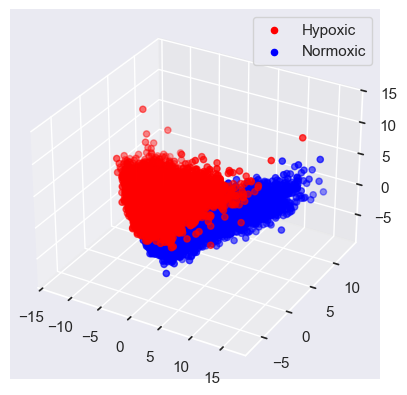

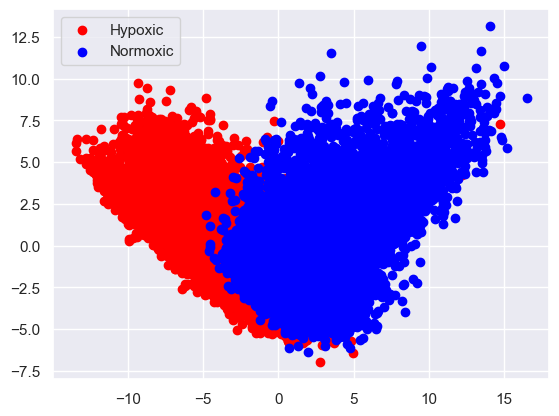

In [219]:
hypoxic = transformed[(index == 'Hypoxic')]
normoxic = transformed[(index == 'Normoxic')]

plot_hypo_normo_3d(hypoxic, normoxic)
plot_hypo_normo_2d(hypoxic, normoxic)

#### K-means clustering

(21626, 1674)
Accuracy (K-means with PCA):  0.5456395079996301
Accuracy (K-means without PCA):  0.5456395079996301


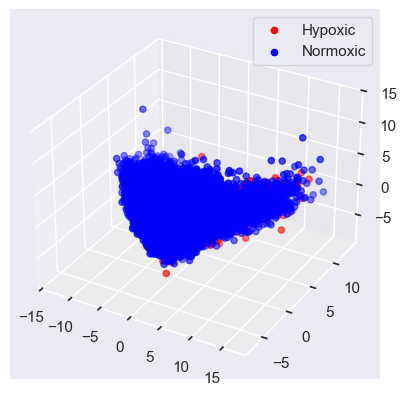

In [220]:
from sklearn.cluster import KMeans

# We found k-means clustering performs better on non-scaled data
transformed_no_scaler = PCA(n_components = EXPLAINED_VARIANCE).fit_transform(df)
print(np.shape(transformed_no_scaler))

kmeans_pca = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(transformed_no_scaler)
result_pca = kmeans_pca.labels_

kmeans_no_pca = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df)
result_no_pca = kmeans_no_pca.labels_

label_map = {
    0: "Hypoxic",
    1: "Normoxic"
}

def accuracy(result):
    num_right = 0
    for i in range(len(result)):
        if label_map[result[i]] == index[i]:
            num_right += 1
    return num_right/len(result)


print('Accuracy (K-means with PCA): ', accuracy(result_pca))
print('Accuracy (K-means without PCA): ', accuracy(result_no_pca))

hypoxic = transformed[(result_pca == 0)]
normoxic = transformed[(result_pca == 1)]

plot_hypo_normo_3d(hypoxic, normoxic)

#### Dendograms

In [ ]:
from scipy.cluster.hierarchy import dendrogram

# These take forever - we omit them
# dendrogram(linkage_matrix(transformed)) # Transformed with a standard scaler
# plt.show()
# dendrogram(linkage_matrix(transformed_no_scaler)) # Transformed without standard scaler
# plt.show()